# Fluctuation analysis in [Coulon, Ferguson et al. 2014, eLife]
If using this code and/or data, please cite https://elifesciences.org/articles/03939 [DOI: 10.7554/eLife.03939].

You can also refer to [Coulon & Larson 2016 https://doi.org/10.1016/bs.mie.2016.03.017] for more information.

In [1]:
from scipy import *
import matplotlib.pyplot as plt
import fluctuationAnalysis_eLife2014 as fa

In [2]:
fa.setDataPath('./data/','./data/')

## Load data and compute individual correlation functions

In [3]:
data=fa.loadExpData('PM51_10s_37deg_03.list.py')

## Plot individual traces

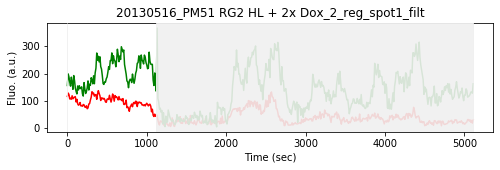

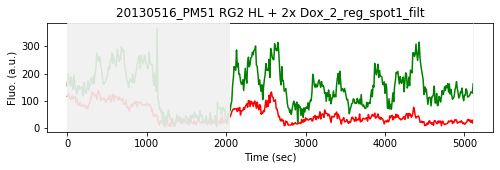

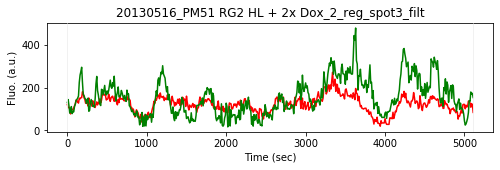

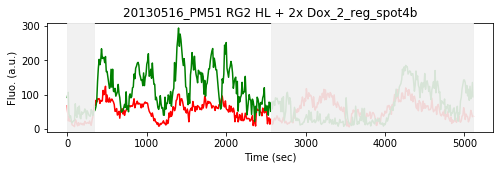

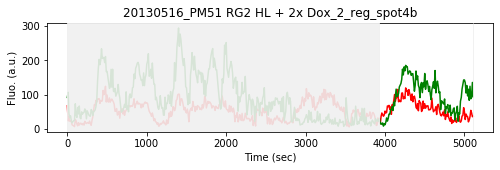

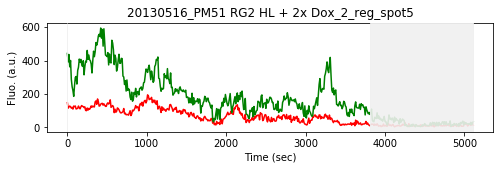

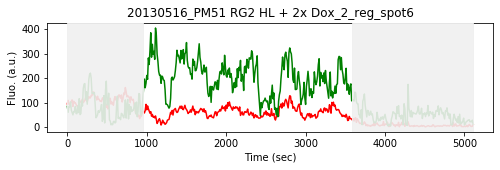

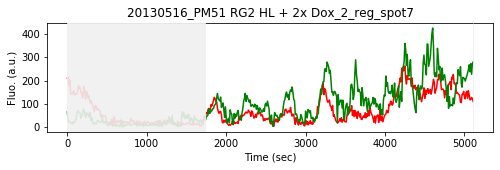

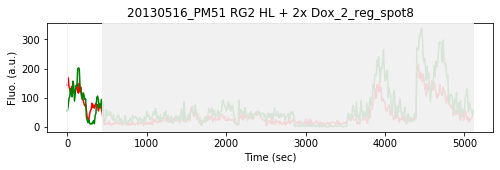

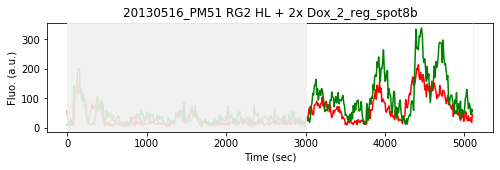

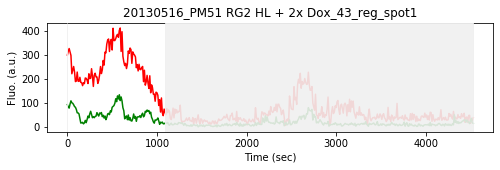

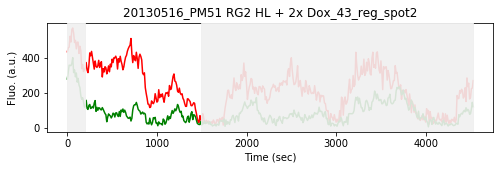

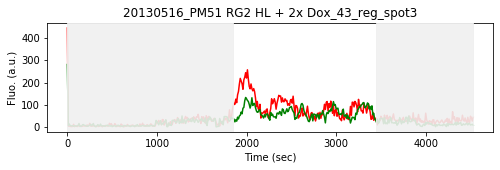

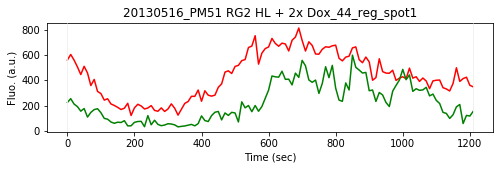

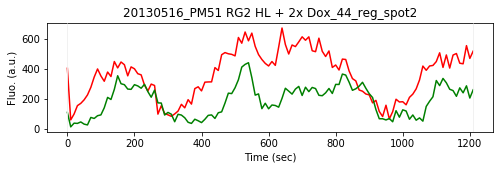

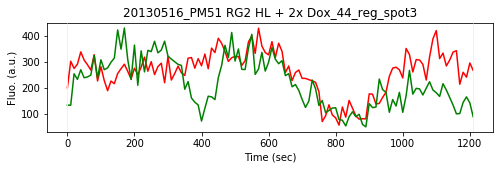

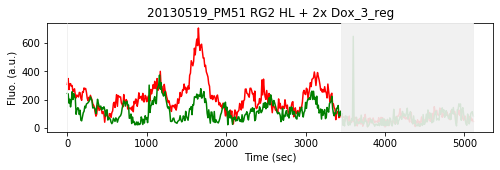

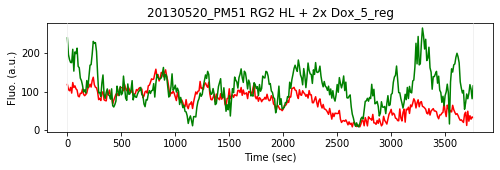

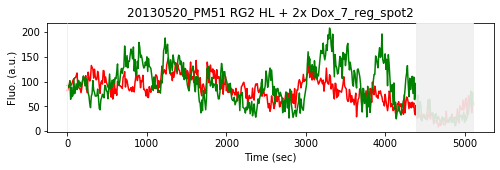

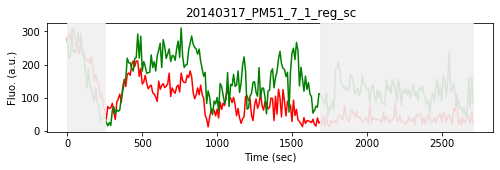

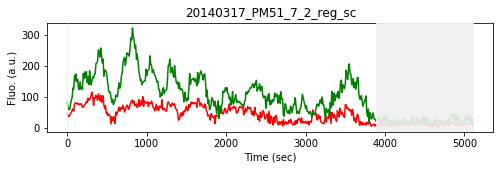

In [4]:
for d in data:
    plt.figure(figsize=(8,2)); plt.xlabel("Time (sec)"); plt.ylabel("Fluo. (a.u.)"); 
    plt.title(d.name)
    plt.gca().axvspan(0,d.frameWindow[0]*d.dt,          alpha=0.9, color='#f0f0f0',zorder=5)
    plt.gca().axvspan((d.frameWindow[1]-1)*d.dt,d.t[-1],alpha=0.9, color='#f0f0f0',zorder=5)
    plt.plot(d.t,d.r/1000,c='red')
    plt.plot(d.t,d.g/1000,c='green')
    plt.show()

## Average correlation funvtions

In [5]:
avgData=fa.avgBootstrap(data,offsetTail=[350,500],normG0=True);

** Averaging and bootstrapping... Done.


## Plot averaged correlation functions

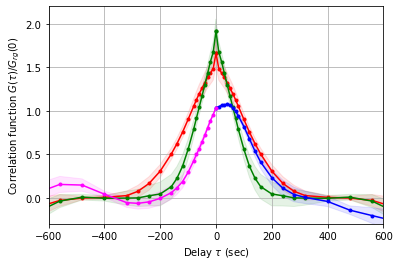

In [6]:
plt.figure()

plt.fill_between( avgData.tau,avgData.bsG[1,0,0],avgData.bsG[2,0,0],color='red',alpha=0.1,zorder=0);
plt.fill_between(-avgData.tau,avgData.bsG[1,0,0],avgData.bsG[2,0,0],color='red',alpha=0.1,zorder=0);
plt.plot(         avgData.tau,avgData.bsG[0,0,0],marker='.',c='red');
plt.plot(        -avgData.tau,avgData.bsG[0,0,0],marker='.',c='red');

plt.fill_between( avgData.tau,avgData.bsG[1,1,1],avgData.bsG[2,1,1],color='green',alpha=0.1,zorder=0);
plt.fill_between(-avgData.tau,avgData.bsG[1,1,1],avgData.bsG[2,1,1],color='green',alpha=0.1,zorder=0);
plt.plot( avgData.tau,avgData.bsG[0,1,1],marker='.',c='green');
plt.plot(-avgData.tau,avgData.bsG[0,1,1],marker='.',c='green');

plt.fill_between( avgData.tau,avgData.bsG[1,0,1],avgData.bsG[2,0,1],color='blue',   alpha=0.1,zorder=0);
plt.fill_between(-avgData.tau,avgData.bsG[1,1,0],avgData.bsG[2,1,0],color='magenta',alpha=0.1,zorder=0);
plt.plot( avgData.tau,avgData.bsG[0,0,1],marker='.',c='blue');
plt.plot(-avgData.tau,avgData.bsG[0,1,0],marker='.',c='magenta');

plt.xlabel("Delay $\\tau$ (sec)"); plt.ylabel("Correlation function $G(\\tau)/G_{rg}(0)$"); 
plt.xlim(-600,600); plt.ylim(-0.3,2.2);
plt.grid()
plt.show()
